In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# Makeover Monday 2020 W6 –– US Wartime Living

For this week's challenge, we are looking at the percentage of lifetime according to birth year where the USA was at war.

Source Article: [Nearly a quarter of Americans have never experienced the U.S. in a time of peace](https://www.washingtonpost.com/politics/2020/01/08/nearly-quarter-americans-have-never-experienced-us-time-peace/)

Data Source: [Washington Post](https://www.washingtonpost.com/)

Makeover Monday Data: [data.world](https://data.world/makeovermonday/2020w6)

## Data Analysis

### Loading the Data:

In [2]:
df = pd.read_excel("US life at war.xlsx")

### Summary Statistics:

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 115 entries, 0 to 114
Data columns (total 2 columns):
Birth year                               115 non-null int64
% of your life the US has been at war    115 non-null float64
dtypes: float64(1), int64(1)
memory usage: 1.9 KB


In [4]:
df.describe()

,Birth year,% of your life the US has been at war
count,115.000000,115.000000
mean,1962.000000,0.574635
std,33.341666,0.221140
min,1905.000000,0.348000
25%,1933.500000,0.436000
50%,1962.000000,0.471000
75%,1990.500000,0.673000
max,2019.000000,1.000000


In [5]:
df.head()

,Birth year,% of your life the US has been at war
0,1905,0.348
1,1906,0.351
2,1907,0.354
3,1908,0.357
4,1909,0.360


### Initial Graph:

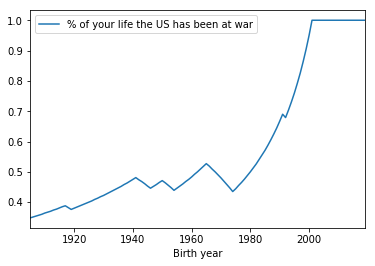

In [6]:
df.plot(x="Birth year", y="% of your life the US has been at war")

### Data Exploration:

In [7]:
df_wars = pd.DataFrame(np.array([['WW1', 1914, 1918], 
                                 ['WW2', 1939, 1945], 
                                 ['Korean War', 1950, 1953],
                                 ['Vietnam War', 1955, 1975],
                                 ['Gulf War', 1990, 1991],
                                 ['Afghanistan War', 2001, 2019]]),
                       columns=['War', 'Start Year', 'End Year'])

df['War'] = None

for index, row in df_wars.iterrows():
    for val in range(int(row['Start Year']), int(row['End Year']) + 1):
        df.loc[df['Birth year'] == val, 'War'] = row['War']

df.tail()

,Birth year,% of your life the US has been at war,War
110,2015,1.0,Afghanistan War
111,2016,1.0,Afghanistan War
112,2017,1.0,Afghanistan War
113,2018,1.0,Afghanistan War
114,2019,1.0,Afghanistan War


In [8]:
df.groupby('War').describe()

Birth year                                             \
                     count    mean       std     min      25%     50%   
War                                                                     
Afghanistan War       19.0  2010.0  5.627314  2001.0  2005.50  2010.0   
Gulf War               2.0  1990.5  0.707107  1990.0  1990.25  1990.5   
Korean War             4.0  1951.5  1.290994  1950.0  1950.75  1951.5   
Vietnam War           21.0  1965.0  6.204837  1955.0  1960.00  1965.0   
WW1                    5.0  1916.0  1.581139  1914.0  1915.00  1916.0   
WW2                    7.0  1942.0  2.160247  1939.0  1940.50  1942.0   

                                 % of your life the US has been at war  \
                     75%     max                                 count   
War                                                                      
Afghanistan War  2014.50  2019.0                                  19.0   
Gulf War         1990.75  1991.0                                   2.0   
Korean War       1952.25  1953.0                                   4.0   
Vietnam War      1970.00  1975.0                                  21.0   
WW1              1917.00  1918.0                                   5.0   
WW2              1943.50  1945.0                                   7.0   

                                                                             
                     mean       std    min      25%     50%      75%    max  
War                                                                          
Afghanistan War  1.000000  0.000000  1.000  1.00000  1.0000  1.00000  1.000  
Gulf War         0.678500  0.016263  0.667  0.67275  0.6785  0.68425  0.690  
Korean War       0.459750  0.009946  0.448  0.45400  0.4600  0.46575  0.471  
Vietnam War      0.480095  0.027729  0.435  0.45800  0.4800  0.50000  0.527  
WW1              0.382600  0.004159  0.377  0.38100  0.3820  0.38500  0.388  
WW2              0.468714  0.009358  0.453  0.46450  0.4690  0.47450  0.481

### Deeper Data Graph:

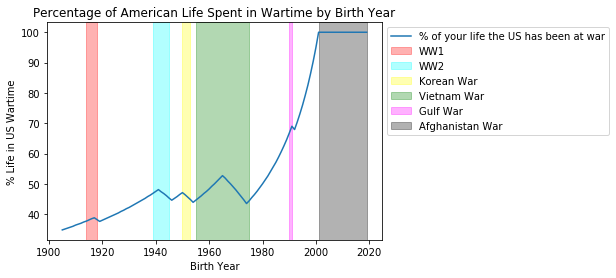

In [9]:
fig, ax = plt.subplots()
ax.plot(df['Birth year'], 100*df['% of your life the US has been at war'])
ax.set(xlabel = 'Birth Year', 
       ylabel = '% Life in US Wartime', 
       title = 'Percentage of American Life Spent in Wartime by Birth Year')

colors = ['red', 'cyan', 'yellow', 'green', 'magenta', 'black']
for index, row in df_wars.iterrows():
    ax.axvspan(int(row['Start Year']), row['End Year'], 
               color = colors[index], 
               alpha=0.3, 
               label = row['War'])
ax.legend(bbox_to_anchor=(1, 1))

fig.savefig("pyplot_Wartime_Living.png")
plt.show()

### Tableau Graph:

My Tableau graph is published [here](https://public.tableau.com/views/2020W6-US_Wartime_Living/USWartimeLife?:display_count=y&publish=yes&:origin=viz_share_link).